In [5]:
import requests
import pandas as pd
import matplotlib
from pylab import hist, show, xticks
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
from tabulate import tabulate
from matplotlib.pyplot import figure
from textwrap import wrap

In [6]:
api_url = 'https://data.cms.gov/data-api/v1/dataset/92396110-2aed-4d63-a6a2-5d6207d46a29/data'
response = requests.get(api_url)
json_response = response.json()
df = pd.json_normalize(json_response)

In [7]:
df.isnull().any()

df.Avg_Sbmtd_Chrg = df.Avg_Sbmtd_Chrg.astype(float)

print("The maximum average submitted charge for all specialties is: $", df.Avg_Sbmtd_Chrg.round(2).max())
print("The minimum average submitted charge for all specialties is: $", df.Avg_Sbmtd_Chrg.round(2).min())
print("The median average submitted charge for all specialties is: $", df.Avg_Sbmtd_Chrg.round(2).median())
mean = df.Avg_Sbmtd_Chrg.mean()
print("The mean average submitted charge for all specialties is: $", round(mean, 2))

The maximum average submitted charge for all specialties is: $ 7700.72
The minimum average submitted charge for all specialties is: $ 0.9
The median average submitted charge for all specialties is: $ 155.64
The mean average submitted charge for all specialties is: $ 341.59


In [8]:
df_radiology = df[(df.Rndrng_Prvdr_Type == 'Diagnostic Radiology')]
df_radiology

,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,...,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
304,1003002148,Owens,Justin,M,M.D.,M,I,243 Curtiss Rd,Ste 100,Barksdale Afb,...,Contrast injections for x-ray imaging through ...,N,F,12,13,13,33.000000,31.685384615,25.365384615,17.436153846
305,1003002148,Owens,Justin,M,M.D.,M,I,243 Curtiss Rd,Ste 100,Barksdale Afb,...,Ct scan head or brain,N,F,388,404,404,47.757426,41.993811881,33.203044554,32.180841584
306,1003002148,Owens,Justin,M,M.D.,M,I,243 Curtiss Rd,Ste 100,Barksdale Afb,...,Ct scan head or brain with contrast,N,F,11,11,11,62.000000,55.348181818,44.383636364,43.14
307,1003002148,Owens,Justin,M,M.D.,M,I,243 Curtiss Rd,Ste 100,Barksdale Afb,...,Ct scan of face,N,F,33,33,33,58.000000,41.883939394,33.563636364,32.273333333
308,1003002148,Owens,Justin,M,M.D.,M,I,243 Curtiss Rd,Ste 100,Barksdale Afb,...,Ct scan of blood vessel of head with contrast,N,F,29,29,29,96.068966,82.92,66.433103448,68.534137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,1003008517,Mendez,Daniel,,MD,M,I,100 Ave Luis Munoz Marin,,Caguas,...,Ultrasound of abdomen,N,F,71,71,71,41.841690,41.576760563,31.864084507,30.141126761
977,1003008517,Mendez,Daniel,,MD,M,I,100 Ave Luis Munoz Marin,,Caguas,...,Ultrasound behind abdominal cavity,N,F,17,17,17,37.542941,36.936470588,29.550588235,28.351764706
978,1003008517,Mendez,Daniel,,MD,M,I,100 Ave Luis Munoz Marin,,Caguas,...,"Ultrasound behind abdominal cavity, limited",N,F,16,16,16,29.640000,29.5475,23.63625,22.56
979,1003008517,Mendez,Daniel,,MD,M,I,100 Ave Luis Munoz Marin,,Caguas,...,Ultrasound of pelvis,N,F,18,18,18,34.978889,33.760555556,27.012222222,25.914444444


In [9]:
df_radiology.Rndrng_Prvdr_Crdntls.unique()

array(['M.D.', 'MD'], dtype=object)

In [10]:
df.Rndrng_Prvdr_Crdntls.value_counts()

M.D.          476
MD            255
               44
D.O.           34
M.D., PH.D     28
PA-C           28
DO             22
PT             18
APRN NP        17
ARNP           12
DNP            11
P.A.           10
PT, DPT         5
P.T.            4
MPT, DPT        4
P.A.-C.         4
MPT             4
CRNA            4
RPA-C           3
M.D             3
PA              3
O.D.            2
NP              2
PSYD            2
N.P.            2
DC              1
CNP             1
D.C.            1
Name: Rndrng_Prvdr_Crdntls, dtype: int64

In [11]:
# Removing periods from credentials column (M.D. M.D and MD are most likely the same credentials)
df_radiology['Rndrng_Prvdr_Crdntls'] = df_radiology.Rndrng_Prvdr_Crdntls.str.replace(r'.','')

C:\Users\runek\AppData\Local\Temp\ipykernel_5476\3852166211.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_radiology['Rndrng_Prvdr_Crdntls'] = df_radiology.Rndrng_Prvdr_Crdntls.str.replace(r'.','')
C:\Users\runek\AppData\Local\Temp\ipykernel_5476\3852166211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_radiology['Rndrng_Prvdr_Crdntls'] = df_radiology.Rndrng_Prvdr_Crdntls.str.replace(r'.','')


In [12]:
df_radiology.Rndrng_Prvdr_Crdntls.value_counts()

MD    135
Name: Rndrng_Prvdr_Crdntls, dtype: int64

In [13]:
df_radiology['Avg_Sbmtd_Chrg'].dtypes

dtype('float64')

(array([106.,   6.,   2.,   2.,   6.,   6.,   1.,   4.,   0.,   2.]),
 array([1.0000e+00, 6.1090e+02, 1.2208e+03, 1.8307e+03, 2.4406e+03,
        3.0505e+03, 3.6604e+03, 4.2703e+03, 4.8802e+03, 5.4901e+03,
        6.1000e+03]),
 <BarContainer object of 10 artists>)

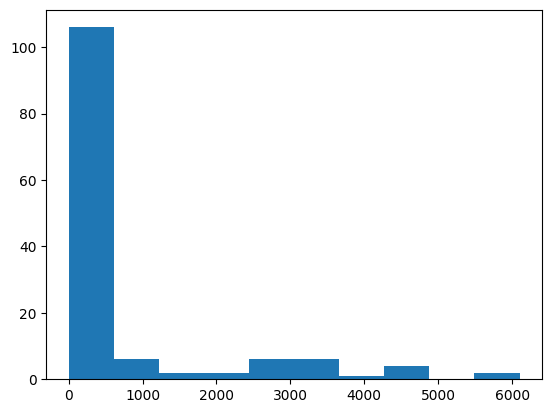

In [14]:
plt.hist(df_radiology.Avg_Sbmtd_Chrg)

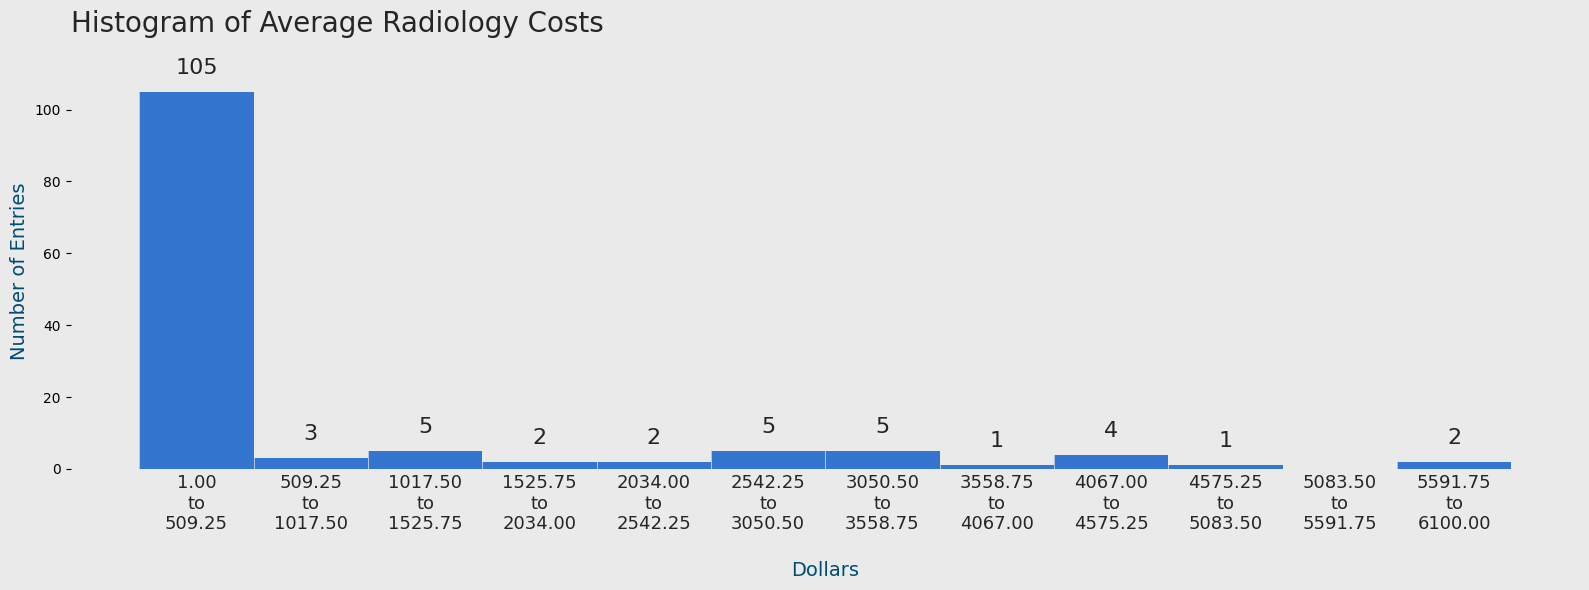

In [15]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'

# fig = plt.figure(figsize = (20,6))
fig, ax = plt.subplots(1, figsize = (16,6), facecolor = facecolor)
ax.set_facecolor(facecolor)
n, bins, patches = plt.hist(df_radiology.Avg_Sbmtd_Chrg, color = color_bars, bins = 'doane')

# define minor ticks and draw a grid with them
minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which = 'minor', color = facecolor, lw = 0.5)

# x ticks
xticks = [(bins[idx + 1] + value) / 2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx + 1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels, c = txt_color1, fontsize = 13)

# remove major and minor ticks from the x axis, but keep the labels
ax.tick_params(axis='x', which='both',length=0)
# Hide the right and top spines
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value + 5, int(value), ha = 'center', fontsize = 16, c = txt_color1)

plt.xticks(xticks, labels = xticks_labels)
plt.title('Histogram of Average Radiology Costs\n', loc = 'left', fontsize = 20, c = txt_color1)
plt.xlabel('\nDollars', c = txt_color2, fontsize = 14)
plt.ylabel('Number of Entries', c = txt_color2, fontsize = 14)

plt.tight_layout()
plt.savefig('costs.png', facecolor=facecolor)

In [16]:
df_radiology_below_500 = df_radiology.loc[df_radiology['Avg_Sbmtd_Chrg'] <= 509.25 ]

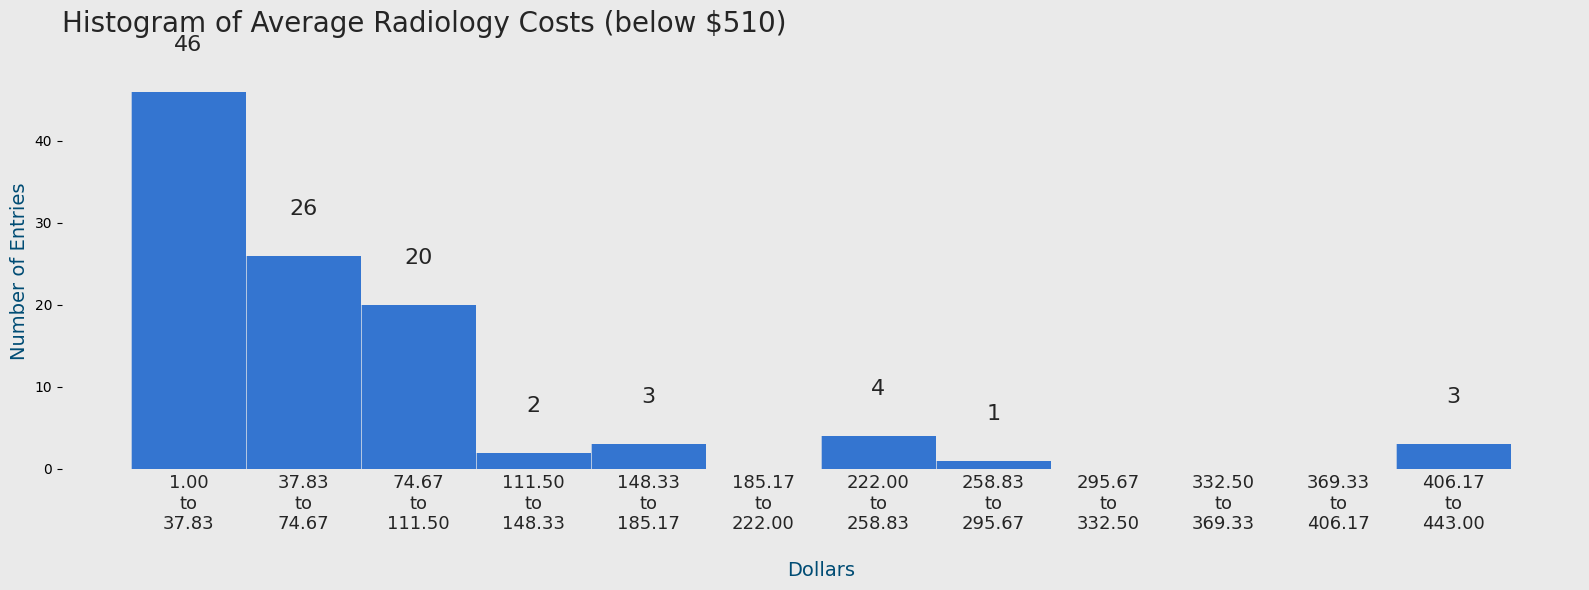

In [17]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'

fig, ax = plt.subplots(1, figsize = (16,6), facecolor = facecolor)
ax.set_facecolor(facecolor)
n, bins, patches = plt.hist(df_radiology_below_500.Avg_Sbmtd_Chrg, color = color_bars, bins = 'doane')

# define minor ticks and draw a grid with them
minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which = 'minor', color = facecolor, lw = 0.5)

# x ticks
xticks = [(bins[idx + 1] + value) / 2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx + 1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels, c = txt_color1, fontsize = 13)

# remove major and minor ticks from the x axis, but keep the labels
ax.tick_params(axis='x', which='both',length=0)
# Hide the right and top spines
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value + 5, int(value), ha = 'center', fontsize = 16, c = txt_color1)

plt.xticks(xticks, labels = xticks_labels)
plt.title('Histogram of Average Radiology Costs (below $510)\n', loc = 'left', fontsize = 20, c = txt_color1)
plt.xlabel('\nDollars', c = txt_color2, fontsize = 14)
plt.ylabel('Number of Entries', c = txt_color2, fontsize = 14)

plt.tight_layout()
plt.savefig('costs.png', facecolor = facecolor)

In [18]:
print("The maximum average submitted charge (for the below 500 set) is: $", df_radiology_below_500.Avg_Sbmtd_Chrg.round(2).max())
print("The minimum average submitted charge (for the below 500 set) is: $", df_radiology_below_500.Avg_Sbmtd_Chrg.round(2).min())
print("The median average submitted charge (for the below 500 set) is: $", df_radiology_below_500.Avg_Sbmtd_Chrg.round(2).median())
mean = df_radiology_below_500.Avg_Sbmtd_Chrg.mean()
print("The mean average submitted charge (for the below 500 set) is: $", round(mean, 2))

The maximum average submitted charge (for the below 500 set) is: $ 443.0
The minimum average submitted charge (for the below 500 set) is: $ 1.0
The median average submitted charge (for the below 500 set) is: $ 45.56
The mean average submitted charge (for the below 500 set) is: $ 69.87


{'whiskers': [<matplotlib.lines.Line2D at 0x2b99fabbfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b99fae4400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b99fabbd00>],
 'medians': [<matplotlib.lines.Line2D at 0x2b99fae4940>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b99fae4be0>],
 'means': []}

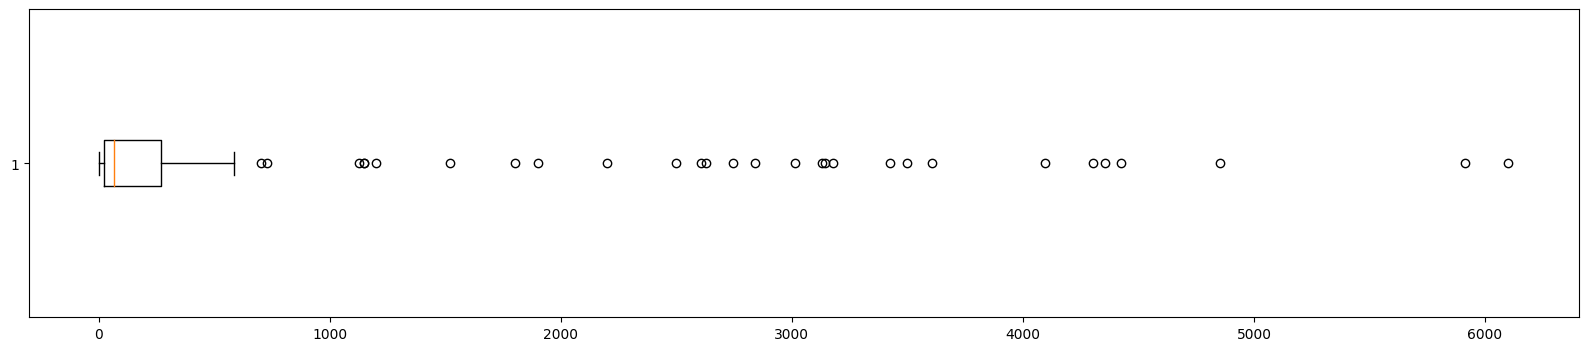

In [19]:
plt.figure(figsize = (20,4))
plt.boxplot(df_radiology['Avg_Sbmtd_Chrg'], vert = False)

In [20]:
df_radiology_above_500 = df_radiology.loc[df_radiology['Avg_Sbmtd_Chrg'] > 509.25 ]

{'whiskers': [<matplotlib.lines.Line2D at 0x2b99fb37460>,
 'caps': [<matplotlib.lines.Line2D at 0x2b99fb37940>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b99fb371c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b99fb37e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b99fb64160>],
 'means': []}

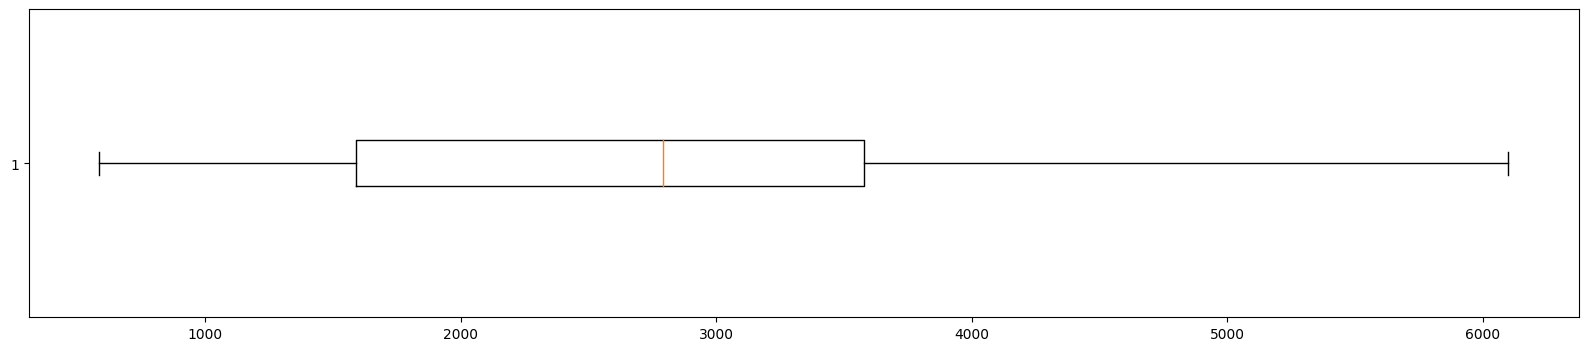

In [21]:
plt.figure(figsize = (20,4))
plt.boxplot(df_radiology_above_500['Avg_Sbmtd_Chrg'], vert = False)

In [22]:
col = 'Avg_Sbmtd_Chrg'
max_x = df_radiology.loc[df_radiology[col].idxmax()]
print('Maximum value of column ', col, ' and its corresponding row values:\n', max_x)

Maximum value of column  Avg_Sbmtd_Chrg  and its corresponding row values:
 Rndrng_NPI                                                              1003002809
Rndrng_Prvdr_Last_Org_Name                                                Graziano
Rndrng_Prvdr_First_Name                                                    Vincent
Rndrng_Prvdr_MI                                                                   
Rndrng_Prvdr_Crdntls                                                            MD
Rndrng_Prvdr_Gndr                                                                M
Rndrng_Prvdr_Ent_Cd                                                              I
Rndrng_Prvdr_St1                                                      45 W 11th St
Rndrng_Prvdr_St2                                                            Apt 1a
Rndrng_Prvdr_City                                                         New York
Rndrng_Prvdr_State_Abrvtn                                                       NY
Rndrng_Prvd

In [23]:
df_radiology_Graziano = df_radiology[(df_radiology.Rndrng_Prvdr_Last_Org_Name == 'Graziano')]

In [25]:
df_radiology_minus_Graziano = df_radiology[df_radiology.Rndrng_Prvdr_Last_Org_Name.str.contains('Graziano') == False]

In [26]:
print("The maximum average submitted charge (for Dr Graziano in New York) is: \n$", df_radiology_Graziano.Avg_Sbmtd_Chrg.round(2).max())
print("The maximum average submitted charge (for the whole radiology set minus Graziano) is: \n$", df_radiology_minus_Graziano.Avg_Sbmtd_Chrg.round(2).max())
print("The minimum average submitted charge (for Dr Graziano in New York) is: \n$", df_radiology_Graziano.Avg_Sbmtd_Chrg.round(2).min())
print("The minimum average submitted charge (for the whole radiology set minus Graziano) is: \n$", df_radiology_minus_Graziano.Avg_Sbmtd_Chrg.round(2).min())
print("The median average submitted charge (for Dr Graziano in New York) is: \n$", df_radiology_Graziano.Avg_Sbmtd_Chrg.round(2).median())
print("The median average submitted charge (for the whole radiology set minus Graziano) is: \n$", df_radiology_minus_Graziano.Avg_Sbmtd_Chrg.round(2).median())
mean = df_radiology_Graziano.Avg_Sbmtd_Chrg.mean()
mean_minus_G = df_radiology_minus_Graziano.Avg_Sbmtd_Chrg.mean()
print("The mean average submitted charge (for Dr Graziano in New York) is: \n$", round(mean, 2))
print("The mean average submitted charge (for the whole radiology set minus Graziano) is: \n$", round(mean_minus_G, 2))

The maximum average submitted charge (for Dr Graziano in New York) is: 
$ 6100.0
The maximum average submitted charge (for the whole radiology set minus Graziano) is: 
$ 280.15
The minimum average submitted charge (for Dr Graziano in New York) is: 
$ 1.0
The minimum average submitted charge (for the whole radiology set minus Graziano) is: 
$ 8.68
The median average submitted charge (for Dr Graziano in New York) is: 
$ 2350.0
The median average submitted charge (for the whole radiology set minus Graziano) is: 
$ 45.56
The mean average submitted charge (for Dr Graziano in New York) is: 
$ 2258.54
The mean average submitted charge (for the whole radiology set minus Graziano) is: 
$ 61.15


In [27]:
df_radiology_minus_Graziano

,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,...,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
304,1003002148,Owens,Justin,M,MD,M,I,243 Curtiss Rd,Ste 100,Barksdale Afb,...,Contrast injections for x-ray imaging through ...,N,F,12,13,13,33.000000,31.685384615,25.365384615,17.436153846
305,1003002148,Owens,Justin,M,MD,M,I,243 Curtiss Rd,Ste 100,Barksdale Afb,...,Ct scan head or brain,N,F,388,404,404,47.757426,41.993811881,33.203044554,32.180841584
306,1003002148,Owens,Justin,M,MD,M,I,243 Curtiss Rd,Ste 100,Barksdale Afb,...,Ct scan head or brain with contrast,N,F,11,11,11,62.000000,55.348181818,44.383636364,43.14
307,1003002148,Owens,Justin,M,MD,M,I,243 Curtiss Rd,Ste 100,Barksdale Afb,...,Ct scan of face,N,F,33,33,33,58.000000,41.883939394,33.563636364,32.273333333
308,1003002148,Owens,Justin,M,MD,M,I,243 Curtiss Rd,Ste 100,Barksdale Afb,...,Ct scan of blood vessel of head with contrast,N,F,29,29,29,96.068966,82.92,66.433103448,68.534137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,1003008517,Mendez,Daniel,,MD,M,I,100 Ave Luis Munoz Marin,,Caguas,...,Ultrasound of abdomen,N,F,71,71,71,41.841690,41.576760563,31.864084507,30.141126761
977,1003008517,Mendez,Daniel,,MD,M,I,100 Ave Luis Munoz Marin,,Caguas,...,Ultrasound behind abdominal cavity,N,F,17,17,17,37.542941,36.936470588,29.550588235,28.351764706
978,1003008517,Mendez,Daniel,,MD,M,I,100 Ave Luis Munoz Marin,,Caguas,...,"Ultrasound behind abdominal cavity, limited",N,F,16,16,16,29.640000,29.5475,23.63625,22.56
979,1003008517,Mendez,Daniel,,MD,M,I,100 Ave Luis Munoz Marin,,Caguas,...,Ultrasound of pelvis,N,F,18,18,18,34.978889,33.760555556,27.012222222,25.914444444


In [28]:
df_radiology_stats_minus_Grazi = df_radiology_minus_Graziano.agg({'Avg_Sbmtd_Chrg':['min', 'max', 'median', 'mean']})
df_radiology_stats_Graziano = df_radiology_Graziano.agg({'Avg_Sbmtd_Chrg': ['min', 'max', 'median', 'mean']})

In [29]:
df_radiology_stats_minus_Grazi.Avg_Sbmtd_Chrg

min         8.679091
max       280.153846
median     45.555556
mean       61.148371
Name: Avg_Sbmtd_Chrg, dtype: float64

In [30]:
df_radiology_stats_Graziano = df_radiology_stats_Graziano.rename(columns = {'Avg_Sbmtd_Chrg':"Graziona's Average Charges"})
df_radiology_stats_Graziano

,Graziona's Average Charges
min,1.000000
max,6100.000000
median,2350.000000
mean,2258.537995


In [31]:
df_radiology_stats_minus_Grazi = df_radiology_stats_minus_Grazi.rename(columns = {'Avg_Sbmtd_Chrg':"Other Doctors' Average Charges"})

In [32]:
grazi_compare_radiology_df = pd.concat([df_radiology_stats_minus_Grazi, df_radiology_stats_Graziano], axis = 1)

In [33]:
print(tabulate(grazi_compare_radiology_df, headers = 'keys', tablefmt = 'psql'))

+--------+----------------------------------+------------------------------+
|        |   Other Doctors' Average Charges |   Graziona's Average Charges |
|--------+----------------------------------+------------------------------|
| min    |                          8.67909 |                         1    |
| max    |                        280.154   |                      6100    |
| median |                         45.5556  |                      2350    |
| mean   |                         61.1484  |                      2258.54 |
+--------+----------------------------------+------------------------------+


In [34]:
grazi_compare_radiology_df['Difference'] = grazi_compare_radiology_df["Graziona's Average Charges"] - grazi_compare_radiology_df["Other Doctors' Average Charges"]

In [35]:
print(tabulate(grazi_compare_radiology_df, headers = 'keys', tablefmt = 'psql'))

+--------+----------------------------------+------------------------------+--------------+
|        |   Other Doctors' Average Charges |   Graziona's Average Charges |   Difference |
|--------+----------------------------------+------------------------------+--------------|
| min    |                          8.67909 |                         1    |     -7.67909 |
| max    |                        280.154   |                      6100    |   5819.85    |
| median |                         45.5556  |                      2350    |   2304.44    |
| mean   |                         61.1484  |                      2258.54 |   2197.39    |
+--------+----------------------------------+------------------------------+--------------+


In [36]:
grazi_compare_radiology_df["Other Doctors' Average Charges"] = grazi_compare_radiology_df["Other Doctors' Average Charges"].round(2)
grazi_compare_radiology_df["Graziona's Average Charges"] = grazi_compare_radiology_df["Graziona's Average Charges"].round(2)
grazi_compare_radiology_df['Difference'] = grazi_compare_radiology_df.Difference.round(2)

In [37]:
grazi_compare_radiology_df = grazi_compare_radiology_df.drop(['Difference'], axis = 1)

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)

ax = grazi_compare_radiology_df.plot.bar(rot = 0, color = ['#ff6361','#ffa600'])

ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 500))

for bars in ax.containers:
    ax.bar_label(bars, fontsize = 15, color = 'white', fontweight = 'bold')

ax.legend(loc = 1, prop = {'size': 20})

ax.set_facecolor('xkcd:navy')

plt.grid()
plt.title("\n".join(wrap("Statistics for Average Submitted Charges in Radiology - with and without Dr Graziona")), fontsize = 25)
plt.xlabel("Statistic", fontsize = 20)
plt.ylabel("Amount of Charges in Dollars", fontsize = 20)